In [ ]:
import pandas as pd

experiment_files = {
    "standard alpha=1.0": "results/log_0_ResNet18_standard_1.0.csv",
    "weighted alpha=1.0 gamma=0.5": "results/log_0_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25": "results/log_0_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125": "results/log_0_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1": "results/log_0_ResNet18_weighted_1.csv",
    "weighted alpha=1.0 gamma=2": "results/log_0_ResNet18_weighted_2.csv",
    "weighted alpha=1.0 gamma=4": "results/log_0_ResNet18_weighted_4.csv",
    "weighted alpha=1.0 gamma=8": "results/log_0_ResNet18_weighted_8.csv",
    "standard alpha=0.1": "results/log_alpha01_ResNet18_standard_1.0.csv",
    "standard alpha=0.2": "results/log_alpha02_ResNet18_standard_1.0.csv",
    "erm decay=1e-2": "results/log_decay1e-2_ResNet18_erm_1.0.csv",
    "erm decay=1e-3": "results/log_decay1e-3_ResNet18_erm_1.0.csv",
    "erm decay=1e-4": "results/log_decay1e-4_ResNet18_erm_1.0.csv",
    "weighted alpha=1.0 gamma=0.5 mu=0": "results/log_mu0_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25 mu=0": "results/log_mu0_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125 mu=0": "results/log_mu0_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1 mu=0": "results/log_mu0_ResNet18_weighted_1.csv",
    "weighted alpha=0.1 gamma=1 mu=0.5": "results/log_mu05_alpha01_ResNet18_weighted_1.csv",
    "weighted alpha=0.2 gamma=1 mu=0.5": "results/log_mu05_alpha02_ResNet18_weighted_1.csv",
    "weighted alpha=1.0 gamma=0.5 mu=0.5": "results/log_mu05_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25 mu=0.5": "results/log_mu05_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125 mu=0.5": "results/log_mu05_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1 mu=0.5": "results/log_mu05_ResNet18_weighted_1.csv",
}

df = pd.concat(
    [
        pd.read_csv(file).assign(experiment=experiment)
        for experiment, file in experiment_files.items()
    ]
)

df["train acc"] = df["train acc"] / 100
df["test acc"] = df["test acc"] / 100

In [ ]:
print("Best test accuracy at any epoch for each experiment:")
print(df.groupby("experiment")["test acc"].max().sort_values(ascending=False))

In [ ]:
print("Best median test accuracy in last 10 epochs for each experiment:")
last_10 = df.groupby("experiment")["test acc"].apply(lambda x: x.tail(10))
medians = last_10.groupby("experiment").median()
medians.sort_values(ascending=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Train accuracy")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Test accuracy")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Train loss")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Test Loss")
plt.show()

In [22]:
import torch
import numpy as np
import pandas as pd


cifar10_name_power_filename = [
    (
        "gamma=0.063",
        -4.0,
        "results/cm_mu05_ResNet18_weighted_0.063_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=0.088",
        -3.5,
        "results/cm_mu05_ResNet18_weighted_0.088_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=0.125",
        -3.0,
        "results/cm_mu05_ResNet18_weighted_0.125.pt",
    ),
    (
        "gamma=0.177",
        -2.5,
        "results/cm_mu05_ResNet18_weighted_0.177_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=0.250",
        -2.0,
        "results/cm_mu05_ResNet18_weighted_0.25.pt",
    ),
    # ( "gamma=0.354", -1.5,"results/cm_mu05_ResNet18_weighted_0.354_gammagrowth=1.0_step=100.pt",),
    (
        "gamma=0.500",
        -1.0,
        "results/cm_mu05_ResNet18_weighted_0.5.pt",
    ),
    # ( "gamma=0.707", -0.5, "results/cm_mu05_ResNet18_weighted_0.707_gammagrowth=1.0_step=100.pt",),
    (
        "gamma=1.000",
        0.0,
        "results/cm_mu05_ResNet18_weighted_1.pt",
    ),
    # ( "gamma=1.414", 0.5, "results/cm_mu05_ResNet18_weighted_1.414_gammagrowth=1.0_step=100.pt",),
    # ( "gamma=2.000", 1.0, "results/cm_mu05_ResNet18_weighted_2_gammagrowth=1.0_step=100.pt",),
]

power_gammainfilename = [
    (-4.0, 0.063),
    # (-3.5, 0.088),
    (-3.0, 0.125),
    (-2.5, 0.177),
    # (-2.0, 0.250),
    # (-1.0, 0.500),
    # (0.0, 1.000),
    # (0.5, 1.414),
    # (1.0, 2.000),
]

cifar100_name_power_filename = [
    (
        f"gamma={gamma}",
        power,
        f"cifar100results/cm_mu05_ResNet18_weighted_{gamma}_gammagrowth=1.0_step=100.pt",
    )
    for power, gamma in power_gammainfilename
]

In [23]:
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix

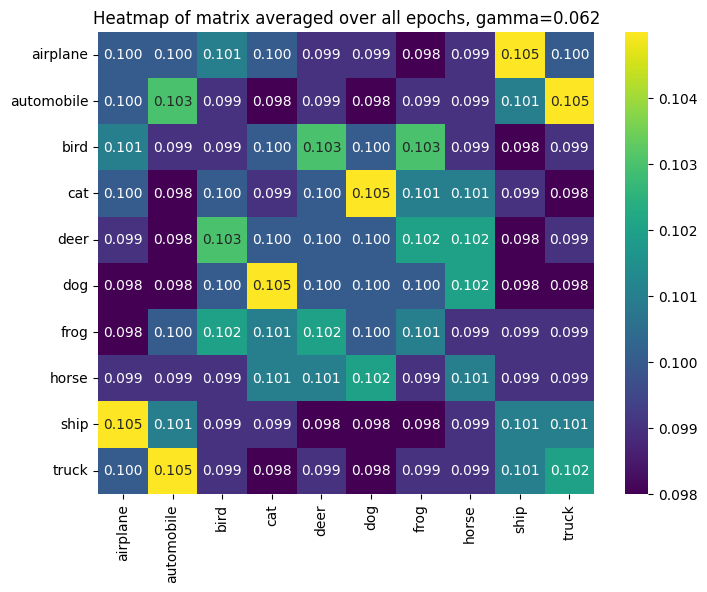

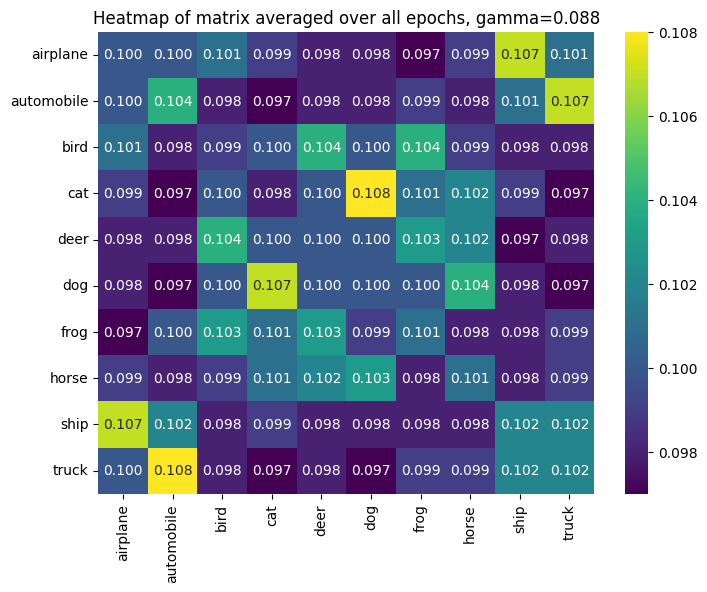

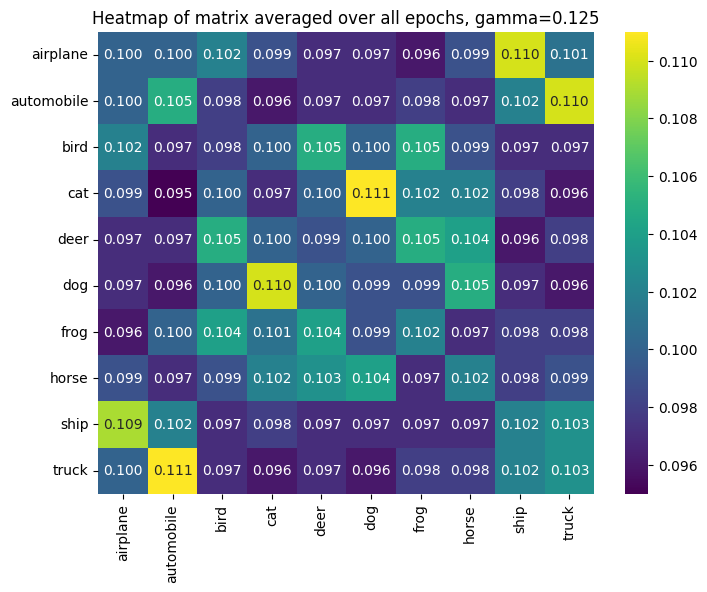

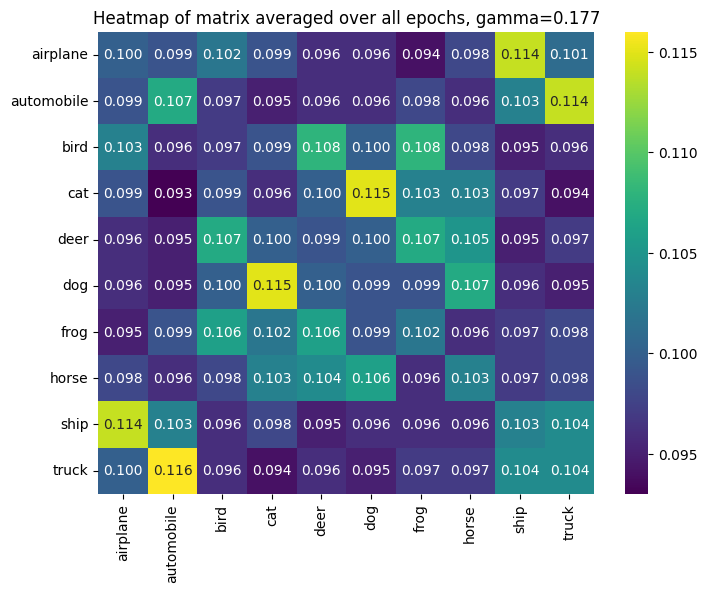

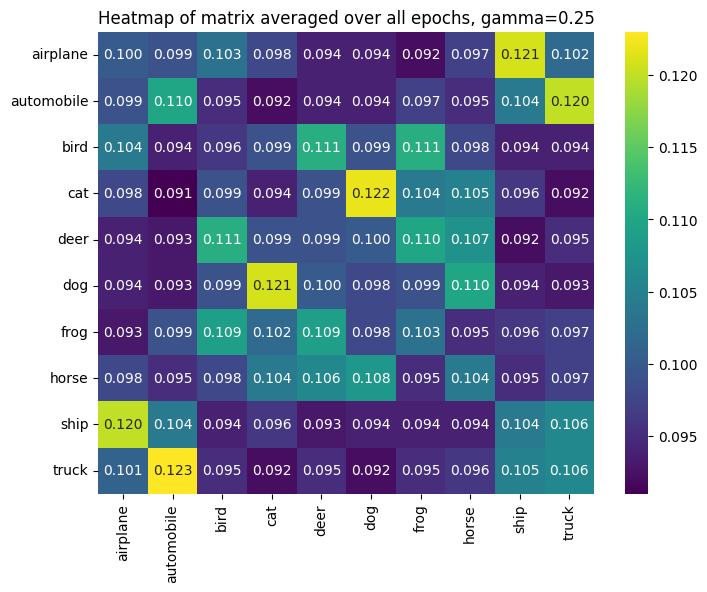

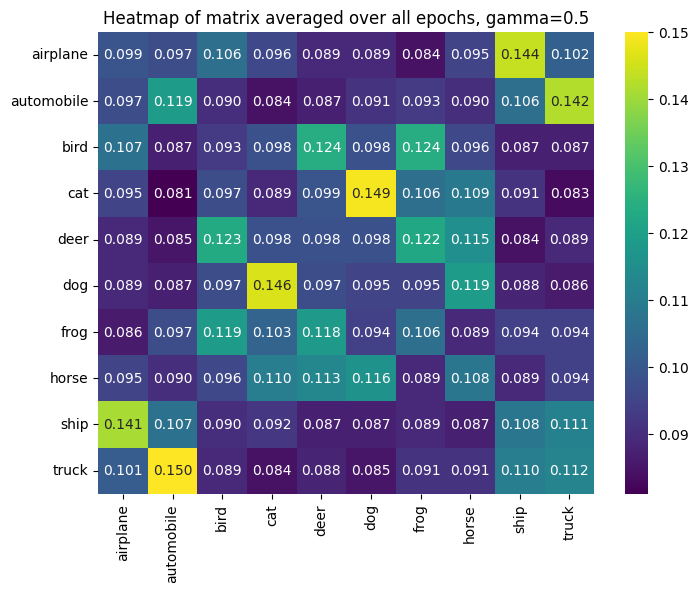

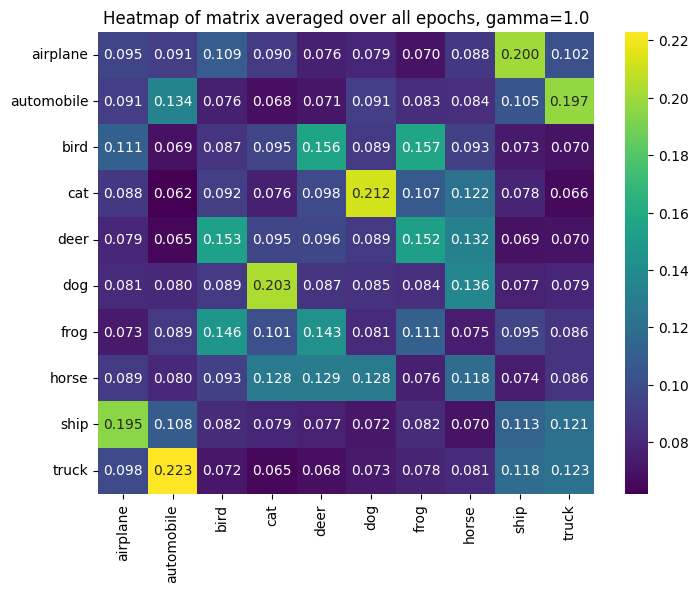

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]


for name, power, filename in cifar10_name_power_filename:
    cms = torch.load(filename).numpy()

    gamma = 2**power
    cms = cms**gamma
    cms = make_doubly_stochastic(cms)

    cm_post_avg = np.round(np.mean(cms, axis=2), 3)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm_post_avg,
        cmap="viridis",
        fmt=".3f",
        annot=cm_post_avg,
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.title(f"Heatmap of matrix averaged over all epochs, gamma={np.round(gamma, 3)}")
    plt.show()

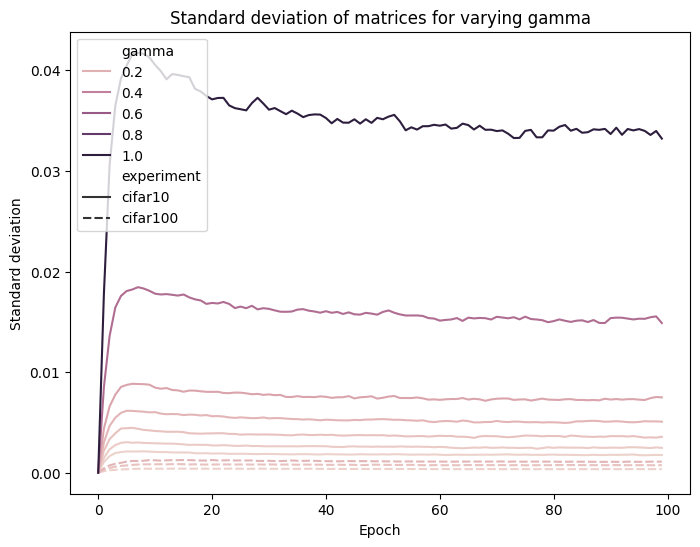

In [25]:
cifar10_name_power_filename = [
    ("cifar10", name, power, filename)
    for name, power, filename in cifar10_name_power_filename
]
cifar100_name_power_filename = [
    ("cifar100", name, power, filename)
    for name, power, filename in cifar100_name_power_filename
]
data = cifar10_name_power_filename + cifar100_name_power_filename

df_cms = []
for experiment, name, power, filename in data:
    cms = torch.load(filename).numpy()

    gamma = 2**power
    cms = cms**gamma
    cms = make_doubly_stochastic(cms)

    for epoch in range(cms.shape[2]):
        cm = cms[:, :, epoch]
        cm_std = np.std(cm)
        df_cms.append(
            {
                "experiment": experiment,
                "name": name,
                "gamma": gamma,
                "epoch": epoch,
                "cms_std": cm_std,
            }
        )
df_cms = pd.DataFrame(df_cms)

# plot the standard deviation of the confusion matrices
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_cms, x="epoch", y="cms_std", hue="gamma", style="experiment")
plt.title("Standard deviation of matrices for varying gamma")
plt.xlabel("Epoch")
plt.ylabel("Standard deviation")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_pre", hue="experiment")
plt.title("Standard deviation of confusion matrix before Gamma and Sinkhorn-Knopp")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_post", hue="experiment")
plt.title("Standard deviation of confusion matrix after Gamma and Sinkhorn-Knopp")
plt.show()

In [ ]:
# plot accuracy (median of last 10 epochs) and std dev of cm (after gamma and sinkhorn-knopp) (median of last 10 epochs) as a function of gamma
gamma_df = df_merged.groupby("experiment").tail(10)
gamma_df = gamma_df.groupby("experiment").median()
gamma_df = gamma_df.reset_index()
gamma_df["gamma"] = gamma_df["experiment"].str.split("=").str[-1].astype(float)
gamma_df

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=gamma_df, x="gamma", y="test acc")
sns.scatterplot(data=gamma_df, x="gamma", y="std_post")
plt.xscale("log")
plt.xticks(gamma_df["gamma"].unique().sort())
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.lineplot(
    data=df,
    x="epoch",
    y="test acc",
    hue="experiment",
    style="experiment",
    markers=True,
    dashes=False,
)
plt.title("Test Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
plt.legend(title="Experiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns


# Define the function for making matrices doubly stochastic
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix


# Load the confusion matrices for both Standard Alpha and ERM experiments
cms_dict = {
    "standard alpha=1.0": torch.load("results/cm_0_ResNet18_standard_1.0.pt"),
    "standard alpha=0.1": torch.load("results/cm_alpha01_ResNet18_standard_1.0.pt"),
    "standard alpha=0.2": torch.load("results/cm_alpha02_ResNet18_standard_1.0.pt"),
    "erm decay=1e-2": torch.load("results/cm_decay1e-2_ResNet18_erm_1.0.pt"),
    "erm decay=1e-3": torch.load("results/cm_decay1e-3_ResNet18_erm_1.0.pt"),
    "erm decay=1e-4": torch.load("results/cm_decay1e-4_ResNet18_erm_1.0.pt"),
}

# Process each confusion matrix
cms_df = []
for key, value in cms_dict.items():
    cur_df = pd.DataFrame()
    cms = value.permute(2, 0, 1).numpy()

    # Calculate std deviation before any processing
    std_pre = np.std(cms.reshape(100, -1), axis=1)
    cur_df["std_pre"] = std_pre

    # No special processing based on alpha or decay rates prior to making doubly stochastic
    for i in range(100):
        cms[i] = make_doubly_stochastic(cms[i])
    std_post = np.std(cms.reshape(100, -1), axis=1)
    cur_df["std_post"] = std_post

    # Add experiment info
    cur_df["experiment"] = key
    cur_df["epoch"] = np.arange(100)

    cms_df.append(cur_df)

# Merge with main DataFrame
cms_df = pd.concat(cms_df)
df_merged = df.merge(cms_df, on=["experiment", "epoch"], how="right")

In [ ]:
# Plotting standard deviation before and after Sinkhorn-Knopp
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_pre", hue="experiment")
plt.title("Standard deviation of confusion matrix before processing")
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_post", hue="experiment")
plt.title("Standard deviation of confusion matrix after processing")
plt.show()

# Analysis of accuracy and standard deviation post adjustment
standard_erm_df = df_merged.groupby("experiment").tail(10)
standard_erm_df = standard_erm_df.groupby("experiment").median()
standard_erm_df = standard_erm_df.reset_index()
standard_erm_df["parameter"] = standard_erm_df["experiment"].str.extract(
    r"=(\d+e?-\d*|\d+\.\d*)"
)

# Optionally, plot accuracy and standard deviation as a function of parameter
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=standard_erm_df,
    x="parameter",
    y="test acc",
    color="blue",
    label="Test Accuracy",
)
sns.scatterplot(
    data=standard_erm_df,
    x="parameter",
    y="std_post",
    color="red",
    label="Std Dev After",
)
plt.xlabel("Parameter Value")
plt.ylabel("Values")
plt.legend()
plt.show()

In [ ]:
# Extract median values of the last 10 epochs and format the DataFrame
alpha_erm_df = df_merged.groupby("experiment").tail(10)
alpha_erm_df = alpha_erm_df.groupby("experiment").median()
alpha_erm_df = alpha_erm_df.reset_index()

# Extract the alpha or decay values for labeling purposes
import re


def extract_alpha_erm(experiment_name):
    # This function extracts alpha or decay values from the experiment names
    alpha_match = re.search(r"alpha=(\d+\.\d+|\d+)", experiment_name)
    decay_match = re.search(r"decay=(\d+e-\d+)", experiment_name)
    if alpha_match:
        return alpha_match.group(1)
    elif decay_match:
        return decay_match.group(1)
    return "N/A"  # In case no matching pattern is found


alpha_erm_df["parameter"] = alpha_erm_df["experiment"].apply(extract_alpha_erm)

# Selecting relevant columns to display
columns_to_display = [
    "experiment",
    "epoch",
    "train acc",
    "test loss",
    "test acc",
    "std_pre",
    "std_post",
    "parameter",
]
alpha_erm_df = alpha_erm_df[columns_to_display]

# Printing the DataFrame in a clean table format
print(alpha_erm_df)

# # save this DataFrame to a CSV file
# alpha_erm_df.to_csv('alpha_erm_analysis.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Gamma Experiments
gamma_data = {
    "Gamma": [0.125, 0.25, 0.5, 1, 2, 4, 8],
    "Max Test Accuracy": [0.9441, 0.9411, 0.9428, 0.9429, 0.9397, 0.9327, 0.9168],
    "Median Test Accuracy": [
        0.93370,
        0.92485,
        0.93425,
        0.93920,
        0.93295,
        0.92325,
        0.89540,
    ],
}

gamma_df = pd.DataFrame(gamma_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    "Gamma",
    "Max Test Accuracy",
    data=gamma_df,
    marker="o",
    markerfacecolor="blue",
    markersize=12,
    color="skyblue",
    linewidth=4,
    label="Max Test Accuracy",
)
plt.plot(
    "Gamma",
    "Median Test Accuracy",
    data=gamma_df,
    marker="D",
    markersize=8,
    color="olive",
    linewidth=2,
    linestyle="dashed",
    label="Median Test Accuracy",
)
plt.legend()
plt.title("Test Accuracies Across Different Gamma (Γ) Values")
plt.xlabel("Gamma (Γ)")
plt.ylabel("Test Accuracy")
# plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for Mu experiments at different Gamma values
mu_data = {
    "Mu": ["0", "0.5", "0.9", "0", "0.5", "0.9"],
    "Gamma": ["1", "1", "1", "0.5", "0.5", "0.5"],
    "Best Test Accuracy": [0.9440, 0.9432, 0.9429, 0.9441, 0.9417, 0.9428],
    "Median Test Accuracy": [0.92975, 0.93850, 0.93920, 0.93450, 0.93420, 0.93425],
}
mu_df = pd.DataFrame(mu_data)

plt.figure(figsize=(10, 6))
# Plotting for Gamma = 1
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "1"],
    x="Mu",
    y="Best Test Accuracy",
    marker="o",
    markerfacecolor="red",
    markersize=12,
    color="pink",
    linewidth=4,
    label="Γ = 1 Best",
)
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "1"],
    x="Mu",
    y="Median Test Accuracy",
    marker="^",
    markersize=8,
    color="brown",
    linestyle="dashed",
    linewidth=2,
    label="Γ = 1 Median",
)

# Plotting for Gamma = 0.5
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "0.5"],
    x="Mu",
    y="Best Test Accuracy",
    marker="D",
    markerfacecolor="blue",
    markersize=12,
    color="lightblue",
    linewidth=4,
    label="Γ = 0.5 Best",
)
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "0.5"],
    x="Mu",
    y="Median Test Accuracy",
    marker="v",
    markersize=8,
    color="green",
    linestyle="dashed",
    linewidth=2,
    label="Γ = 0.5 Median",
)

plt.title("Test Accuracies for Different μ Values Across Γ Values")
plt.xlabel("μ (Mu)")
plt.ylabel("Test Accuracy")
plt.legend(title="Legend")
plt.show()

In [ ]:
# ERM Data
erm_data = {
    "Decay Rate": ["1e-2", "1e-3", "1e-4"],
    "Best Test Accuracy": [0.2878, 0.4790, 0.4885],
    "Median Test Accuracy": [0.10000, 0.47835, 0.48740],
}
erm_df = pd.DataFrame(erm_data)

plt.figure(figsize=(10, 6))
# sns.lineplot(data=erm_df, x='Decay Rate', y='Best Test Accuracy', marker='o', markerfacecolor='red' color='red', linewidth=2.5, markersize=12, label='Best Test Accuracy')
# sns.lineplot(data=erm_df, x='Decay Rate', y='Median Test Accuracy', marker='o', color='lightblue', linestyle='--', linewidth=2.5, markersize=12, label='Median Test Accuracy')

sns.lineplot(
    data=erm_df,
    x="Decay Rate",
    y="Best Test Accuracy",
    marker="o",
    markerfacecolor="red",
    markersize=12,
    color="pink",
    linewidth=4,
    label="Best Test Accuracy",
)
sns.lineplot(
    data=erm_df,
    x="Decay Rate",
    y="Median Test Accuracy",
    marker="D",
    markersize=8,
    color="olive",
    linewidth=2,
    linestyle="dashed",
    label="Median Test Accuracy",
)


plt.title("ERM Decay Rate Test Accuracies")
plt.xlabel("Decay Rate")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns


# Define the function for making matrices doubly stochastic
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix


# Load the confusion matrices for Mu experiments
cms_dict = {
    "weighted alpha=1.0 gamma=0.5 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_0.5.pt"
    ),
    "weighted alpha=1.0 gamma=0.25 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_0.25.pt"
    ),
    "weighted alpha=1.0 gamma=0.125 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_0.125.pt"
    ),
    "weighted alpha=1.0 gamma=1 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_1.pt"
    ),
    "weighted alpha=1.0 gamma=0.5 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_0.5.pt"
    ),
    "weighted alpha=1.0 gamma=0.25 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_0.25.pt"
    ),
    "weighted alpha=1.0 gamma=0.125 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_0.125.pt"
    ),
    "weighted alpha=1.0 gamma=1 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_1.pt"
    ),
}

# Process each confusion matrix
cms_df = []
for key, value in cms_dict.items():
    cur_df = pd.DataFrame()
    cms = value.permute(2, 0, 1).numpy()

    # Calculate std deviation before any processing
    std_pre = np.std(cms.reshape(100, -1), axis=1)
    cur_df["std_pre"] = std_pre

    # Apply doubly stochastic process
    mu = float(key.split("mu=")[-1].split()[0])
    post = cms**mu
    for i in range(100):
        post[i] = make_doubly_stochastic(post[i])
    std_post = np.std(post.reshape(100, -1), axis=1)
    cur_df["std_post"] = std_post

    # Add experiment info
    cur_df["experiment"] = key
    cur_df["epoch"] = np.arange(100)

    cms_df.append(cur_df)

# Merge with main DataFrame
cms_df = pd.concat(cms_df)
df_merged = df.merge(cms_df, on=["experiment", "epoch"], how="right")

In [ ]:
# Plotting standard deviation before and after Sinkhorn-Knopp
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_pre", hue="experiment")
plt.title("Standard deviation of confusion matrix before Mu and Sinkhorn-Knopp")
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_post", hue="experiment")
plt.title("Standard deviation of confusion matrix after Mu and Sinkhorn-Knopp")
plt.show()

# Analysis of accuracy and standard deviation post adjustment
mu_df = df_merged.groupby("experiment").tail(10)
mu_df = mu_df.groupby("experiment").median()
mu_df = mu_df.reset_index()
mu_df["mu"] = mu_df["experiment"].str.extract(r"mu=(\d+\.?\d*)").astype(float)

# plot accuracy and standard deviation as a function of Mu
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mu_df, x="mu", y="test acc", color="blue", label="Test Accuracy")
sns.scatterplot(data=mu_df, x="mu", y="std_post", color="red", label="Std Dev After")
plt.xlabel("Mu")
plt.ylabel("Values")
plt.legend()
plt.show()